In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Different to before, we have now a non-linear dependency between x & y...

In [40]:
N = 10

X = np.sort(2 * np.random.rand(N, 1), axis=0)
y = 4 + 3 * X + 5*X**2 + np.random.randn(N, 1)

In [45]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[4.38947562] [[2.67749651 5.26998859]]


Predicting as before and we see that the fit is quite good

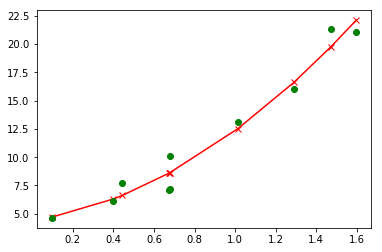

In [46]:
ypred = lin_reg.intercept_ + lin_reg.coef_[0][0]*X + lin_reg.coef_[0][1]*X**2
plt.plot(X, ypred, '-rx', X, y,'go')

Now let's increase the polynom degree to 10 and fit the data

In [57]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[5003348.62470796] [[-1.01085428e+08  7.02709436e+08 -2.37838246e+09  4.22845289e+09
  -3.36833213e+09 -7.84941453e+08  4.04901952e+09 -3.50208240e+09
   1.35339115e+09 -2.03767009e+08]]


... and we run into a classical overfitting; since polydegree = number of data points, we get a perfect match

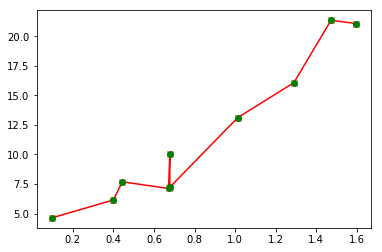

In [59]:
ypred = lin_reg.intercept_ + np.sum([lin_reg.coef_[0][i]*X**(i+1) for i in range(10)], axis=0)
plt.plot(X, ypred, '-rx', X, y,'go')